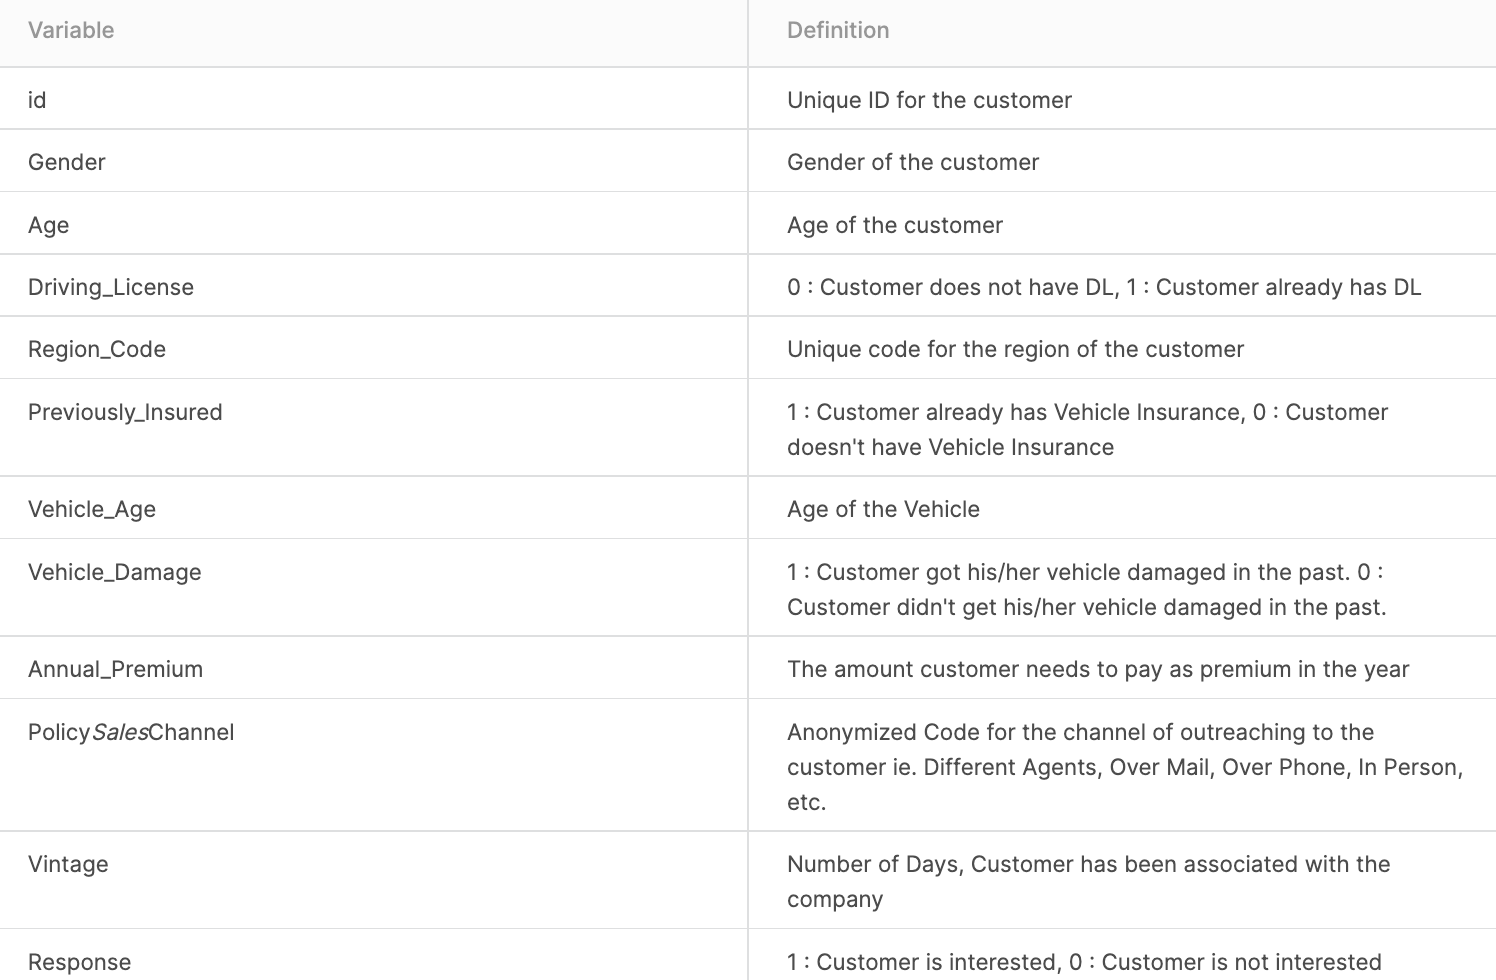

In [6]:
!gdown --id '1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd'
!gdown --id '1IMoIW3JwxqOe7r8cvoy3JMyd8Xp6gTWm'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd
To: /content/train.csv
100% 21.4M/21.4M [00:00<00:00, 217MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1IMoIW3JwxqOe7r8cvoy3JMyd8Xp6gTWm
To: /content/test.csv
100% 6.93M/6.93M [00:00<00:00, 132MB/s]


In [7]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
df.info()
#可觀察到資料無空值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

labelencoder = LabelEncoder()

train_len = len(df)

df = pd.concat([df, test_df], ignore_index=True)

df['Gender'] = labelencoder.fit_transform(df['Gender']) #男->1|女->0
df['Vehicle_Damage'] = labelencoder.fit_transform(df['Vehicle_Damage']) #>Yes->1|No->0
df['Vehicle_Age'] = labelencoder.fit_transform(df['Vehicle_Age'])

df['Annual_Premium'] = StandardScaler().fit_transform(df[['Annual_Premium']])
df['Vintage'] = StandardScaler().fit_transform(df[['Vintage']])

Vehicle_Age = pd.get_dummies(df["Vehicle_Age"])
Region_Code = pd.get_dummies(df["Region_Code"])
Policy_Sales_Channel = pd.get_dummies(df["Policy_Sales_Channel"])
df = pd.concat([df[['Gender', 'Age', 'Driving_License', 'Previously_Insured','Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response']], pd.get_dummies(df["Vehicle_Age"], prefix="Vehicle_Age"), pd.get_dummies(df["Region_Code"], prefix="Region_Code"), pd.get_dummies(df["Policy_Sales_Channel"], prefix="Policy_Sales_Channel")], axis=1)

test_df = df.iloc[train_len:, :]
df = df.iloc[:train_len, :]

df
#將字串型態欄位轉為bool值表現

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_0,Vehicle_Age_1,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,1,44,1,0,1,0.577349,0.748905,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,76,1,0,0,0.173886,0.342540,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,47,1,0,1,0.451376,-1.521956,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,21,1,1,0,-0.112877,0.581578,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,29,1,1,0,-0.178371,-1.378534,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,0,-0.022422,-0.792890,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
381105,1,30,1,1,0,0.551804,-0.278959,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
381106,1,21,1,1,0,0.266149,0.079598,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
381107,0,68,1,0,1,0.820138,-0.960217,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#neg資料增多
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

oversample = SMOTE()
X, y = oversample.fit_resample(df.loc[:, df.columns != 'Response'], df['Response'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
decision_tree = clf.fit(train_X, train_y)
test_y_predicted = decision_tree.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8490825319290188


In [ ]:
from sklearn import svm

clf = svm.SVC()
svm = clf.fit(train_X, train_y)
test_y_predicted = svm.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

In [9]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd = clf.fit(train_X, train_y)
test_y_predicted = sgd.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8163967373060541


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
random_forest = clf.fit(train_X, train_y)
test_y_predicted = random_forest.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8810556660908696


In [11]:
from xgboost import XGBClassifier

xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
xgboost = xgboostModel.fit(train_X, train_y)
test_y_predicted = xgboost.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.815345219503236


In [12]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier().fit(train_X, train_y)
test_y_predicted = ridge.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8235265858762139


In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
passive_aggressive = clf.fit(train_X, train_y)
test_y_predicted = passive_aggressive.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.5872175450116082


In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0).fit(train_X, train_y)
test_y_predicted = logistic_regression.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8045815477306315


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
linear = reg.fit(train_X, train_y)
test_y_predicted = linear.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.9097065304740439


In [16]:
import lightgbm as lgb

model = lgb.LGBMClassifier(is_unbalance=True)
lightGBM = model.fit(train_X, train_y)
test_y_predicted = lightGBM.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8273364626024174


In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
test_y_predicted = gnb.fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.7806247963443198


參考文章：https://yanwei-liu.medium.com/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-%E4%BA%94-%E4%BD%BF%E7%94%A8scikit-learn%E9%80%B2%E8%A1%8Ck-nearest%E6%BC%94%E7%AE%97%E6%B3%95-1191ea94ecaf

->選出最好的cluster

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nn = nca_pipe.fit(train_X, train_y)
test_y_predicted = nn.predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
test_y_predicted = neigh.fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

In [ ]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    test_y_predicted = knn.fit(train_X, train_y).predict(test_X)
    error_rate.append(np.mean(test_y_predicted != test_y))


plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

參考文章(可嘗試方向)：https://ithelp.ithome.com.tw/articles/10275263

->訓練過程中會自動從資料中篩選對模型預測有用的特徵，並移除無幫助預測的特徵。

In [13]:
# iterations: (default)1000
from catboost import CatBoostClassifier

catBoost = CatBoostClassifier(random_state=42)
test_y_predicted = catBoost.fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

Learning rate set to 0.150645
0:	learn: 0.5625431	total: 378ms	remaining: 6m 17s
1:	learn: 0.5016031	total: 681ms	remaining: 5m 40s
2:	learn: 0.4717465	total: 945ms	remaining: 5m 14s
3:	learn: 0.4553531	total: 1.26s	remaining: 5m 14s
4:	learn: 0.4450543	total: 1.56s	remaining: 5m 10s
5:	learn: 0.4382563	total: 1.9s	remaining: 5m 14s
6:	learn: 0.4334319	total: 2.18s	remaining: 5m 8s
7:	learn: 0.4300351	total: 2.41s	remaining: 4m 59s
8:	learn: 0.4275984	total: 2.68s	remaining: 4m 55s
9:	learn: 0.4257287	total: 2.96s	remaining: 4m 52s
10:	learn: 0.4241922	total: 3.13s	remaining: 4m 41s
11:	learn: 0.4227805	total: 3.4s	remaining: 4m 40s
12:	learn: 0.4216314	total: 3.67s	remaining: 4m 38s
13:	learn: 0.4207335	total: 4s	remaining: 4m 41s
14:	learn: 0.4198111	total: 4.27s	remaining: 4m 40s
15:	learn: 0.4188258	total: 4.62s	remaining: 4m 44s
16:	learn: 0.4180477	total: 4.93s	remaining: 4m 45s
17:	learn: 0.4174687	total: 5.2s	remaining: 4m 43s
18:	learn: 0.4168262	total: 5.5s	remaining: 4m 44s


In [14]:
from sklearn.neighbors import RadiusNeighborsClassifier

radiusNeigh = RadiusNeighborsClassifier(radius=1.0)
test_y_predicted = radiusNeigh.fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

ValueError: ignored

In [ ]:
from sklearn.neighbors import NearestNeighbors

NNeigh = NearestNeighbors(n_neighbors=2)
test_y_predicted = NNeigh.fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor

test_y_predicted = HistGradientBoostingRegressor().fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.9046957924331246


In [16]:
from sklearn.ensemble import ExtraTreesClassifier

test_y_predicted = ExtraTreesClassifier(n_estimators=100, random_state=0).fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8922139092511966


In [17]:
from sklearn.ensemble import AdaBoostClassifier

test_y_predicted = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8124330709884876


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

test_y_predicted = GradientBoostingClassifier(
                      n_estimators=100, 
                      learning_rate=1.0,
                      max_depth=1, 
                      random_state=0).fit(train_X, train_y).predict(test_X)

roc_auc = roc_auc_score(test_y, test_y_predicted)
print(roc_auc)

0.8123285935984459




---



---



---



In [ ]:
answer = decision_tree.predict(test_df.loc[:, test_df.columns != 'Response'])
answer

In [ ]:
submit = pd.DataFrame({'id': list(range(381109, 508146)), 'Response': [int(x) for x in answer]}, columns=['id', 'Response'])
submit.to_csv('submission.csv')